In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',None)


In [1]:
import pandas as pd
df = pd.read_csv('emp_promotion.csv')  # if in same folder


In [2]:
print('Shape of train data {}'.format(df.shape))

Shape of train data (54808, 14)


In [3]:
df.head(3)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


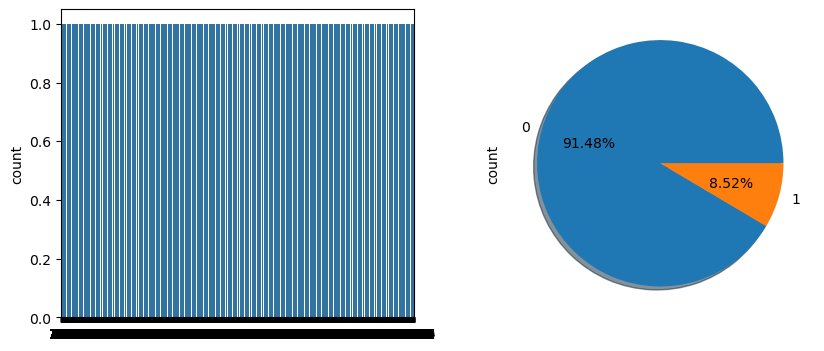

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data is imbalanced
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(df['is_promoted'])
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True)
plt.show()


<Axes: ylabel='avg_training_score'>

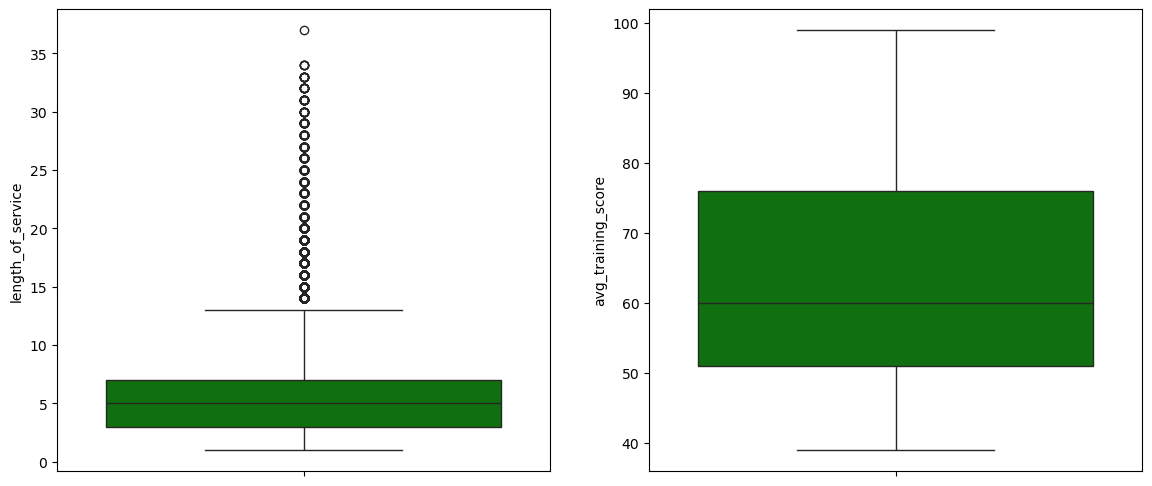

In [5]:
# Length of services column has outliers

plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(df['length_of_service'], color='g')
plt.subplot(122)
sns.boxplot(df['avg_training_score'], color='g')


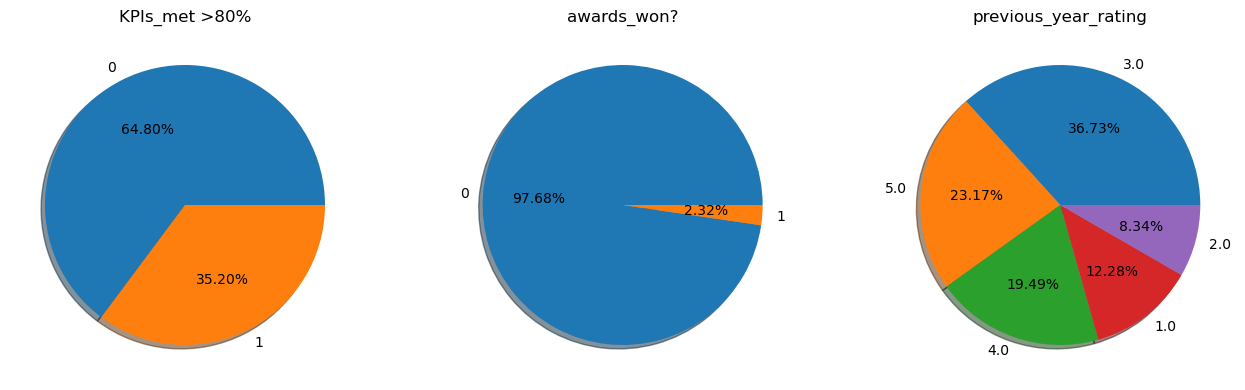

In [6]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
df['awards_won?'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
df['previous_year_rating'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.show()


<Axes: xlabel='avg_training_score', ylabel='previous_year_rating'>

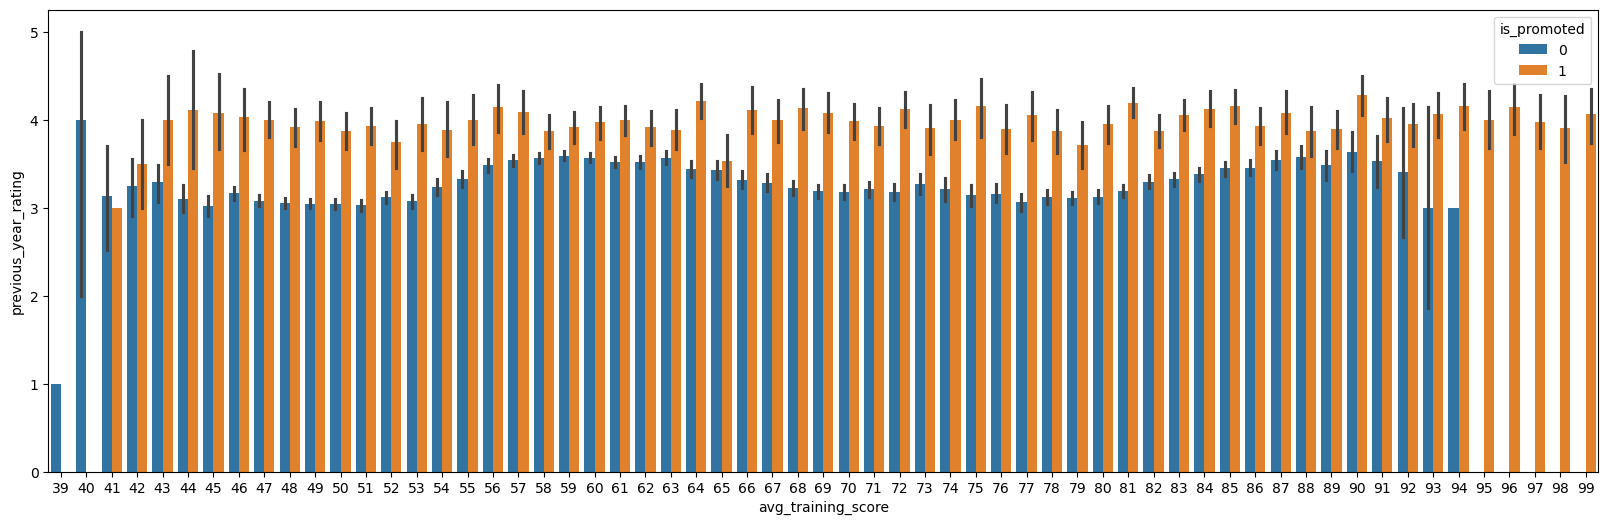

In [7]:
""" From the below bar plot, we came to know that employee with training score > 95 & previous year rating > 3 got promoted. """

plt.figure(figsize=(20,6))
sns.barplot(x='avg_training_score', y='previous_year_rating', hue='is_promoted', data=df)


In [8]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [9]:
""" To predict the promotion, employee id is not required and even sex feature is also not important. 
For promotion, region and recruitment channel are not important. 
So, removing employee_id, gender, recruitment_channel and region """

df = df.drop(['employee_id', 'gender', 'region', 'recruitment_channel'], axis=1)


In [10]:
# Fill missing 'education' with the most frequent value (mode)
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Fill missing 'previous_year_rating' with the median value
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())


In [11]:
# Replacing NaN in 'education' with mode
print(df['education'].value_counts())
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Replacing NaN in 'previous_year_rating' with mode
print(df['previous_year_rating'].value_counts())
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])


education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64
previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


In [12]:
# Finding the employee who got promoted even in poor performance. It affect model performance.
negative = df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & 
              (df['is_promoted']==1) & (df['avg_training_score']<60)]
negative

# Removing negative data
df.drop(index=[31860,51374], inplace=True)


In [13]:
# Handling outliers
import numpy as np
q1 = np.quantile(df['length_of_service'],0.25)
q3 = np.quantile(df['length_of_service'],0.75)

IQR = q3-q1

upperBound = (1.5*IQR)+q3
lowerBound = (1.5*IQR)-q1

print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upperBound)
print('Lower Bound :',lowerBound)
print('Skewed data :',len(df[df['length_of_service']>upperBound]))

""" *** Here outliers can’t be removrd. employee with higher length of services has higher promotion percentage.
     So, capping is done on this feature. """

pd.crosstab([df['length_of_service']>upperBound],df['is_promoted'])

# Capping

df['length_of_service']=[upperBound if x>upperBound else x for x in df['length_of_service']]


q1 : 3.0
q3 : 7.0
IQR : 4.0
Upper Bound : 13.0
Lower Bound : 3.0
Skewed data : 3489


In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Feature mapping is done on education column
df['education'] = df['education'].replace(("Below Secondary", "Bachelor's", "Master's & above"), (1, 2, 3))


In [15]:
# Splitting data and resampling it

x = df.drop('is_promoted', axis=1)
y = df['is_promoted']
print(x.shape)
print(y.shape)

# Convert categorical columns to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in x.select_dtypes(include='object').columns:
    x[col] = label_enc.fit_transform(x[col])

# Apply SMOTE for resampling
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_resample, y_resample = sm.fit_resample(x, y)


(54806, 9)
(54806,)


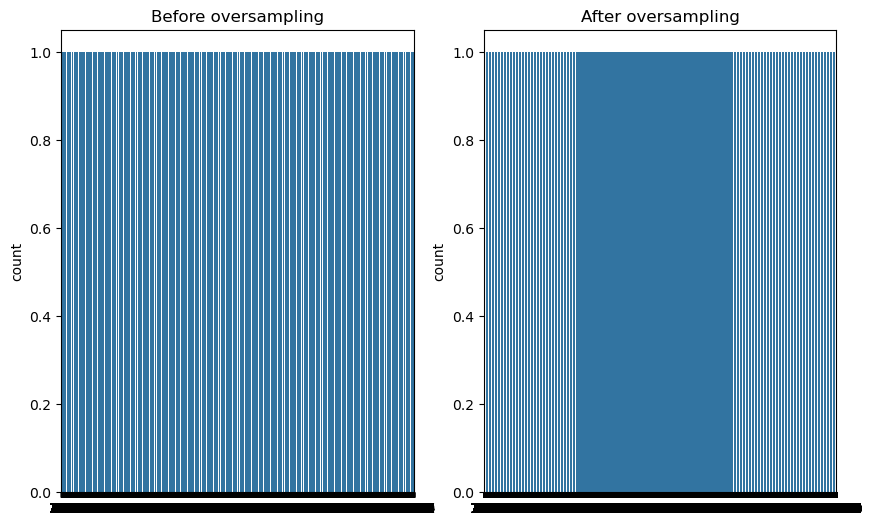

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

plt.subplot(121)
sns.countplot(y)
plt.title('Before oversampling')

plt.subplot(122)
sns.countplot(y_resample)
plt.title('After oversampling')

plt.show()


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.3, random_state=100)

print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))


Shape of x_train (70196, 9)
Shape of y_train (70196,)
Shape of x_test (30084, 9)
Shape of y_test (30084,)


In [19]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


In [20]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


In [21]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


In [22]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train, y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test, yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))


In [23]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)


In [24]:
compareModel(x_train, x_test, y_train, y_test)


***DecisionTreeClassifier***
Confusion matrix
[[13749  1289]
 [  893 14153]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     15038
           1       0.92      0.94      0.93     15046

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[14092   946]
 [  777 14269]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15038
           1       0.94      0.95      0.94     15046

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

-----------------------------------------------

In [25]:
# Random forest model is selected

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)


cv = cross_val_score(rf,x_resample,y_resample,cv=5)
np.mean(cv)


pickle.dump(rf,open('model.pkl','wb'))


In [26]:
cv = cross_val_score(rf,x_resample,y_resample,cv=5)
np.mean(cv)

0.9464200239329876